In [2]:
from environment.models import SinusoidalControlledFixedEnv

import matplotlib.pyplot as plt
import numpy as np

In [3]:
env = SinusoidalControlledFixedEnv(max_t=100, sinusoidal_components=1)
env.delta_t = 0.1
env.latency = 20
print(env.max_t)

100.0


[[0.39220201661352067, 0.27501594605658286], [0.4892041531272293, 0.32497688286507115], [0.5840781598000049, 0.3812377839853413], [0.6718037414919042, 0.43549019129142297], [0.7482095735136514, 0.4803795696376331], [0.8101964289822234, 0.5104136620443469], [0.8559100135245051, 0.5226254225754812], [0.8849113176739243, 0.5171399458835169], [0.8983351598137324, 0.497515899027292], [0.8989398503905756, 0.47047828986940554], [0.8908913636387532, 0.44470556794964655], [0.879161296185213, 0.42878842988937577], [0.8685705651267615, 0.4290938552124126], [0.8627201660288064, 0.44852780461979375], [0.8631919719512365, 0.4867433344149532], [0.8693592875923266, 0.5414105776309572], [0.8788978952991217, 0.6094284543149419], [0.8887539160743285, 0.6869868042145224], [0.8961134936530436, 0.7682331406505847], [0.8989856673296931, 0.843518007987248]]


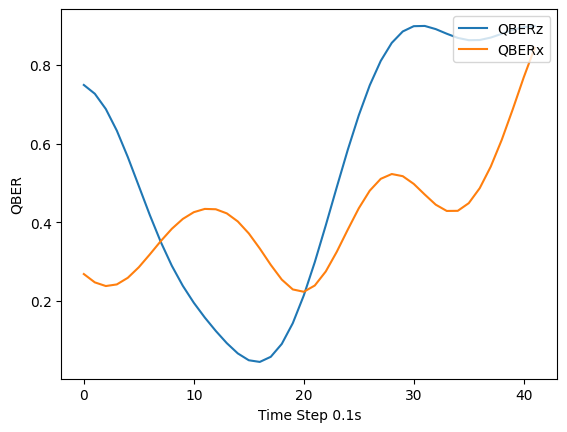

In [4]:
env.reset()

while not env.done:
    s, r, done = env.step()
    print(s)
    break

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

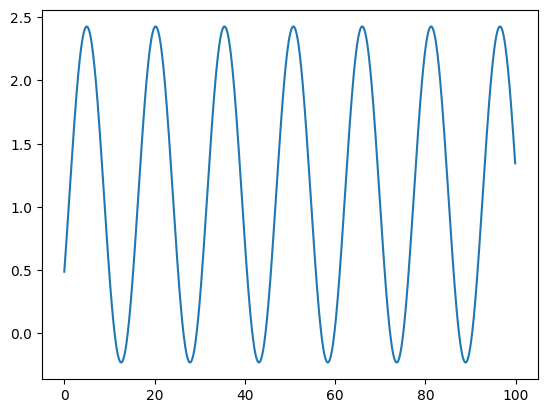

In [5]:
from environment.control import sinusoidal_control
from random import gauss

t = np.arange(0,env.max_t,env.delta_t)
_c = []
c = [np.array([gauss(0,1) for _ in range(4)])]
for i in range(len(t)):
    _c.append(sinusoidal_control(t[i], c))
plt.plot(t,_c)

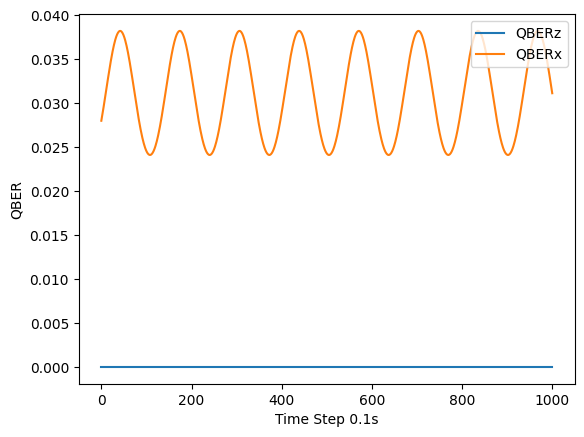

In [6]:
env.fixed_errors_flags = [True, True, True, True,
                          False, True, True, True,
                          True, True, True, True]

env.reset()

while not env.done:
    env.step()

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

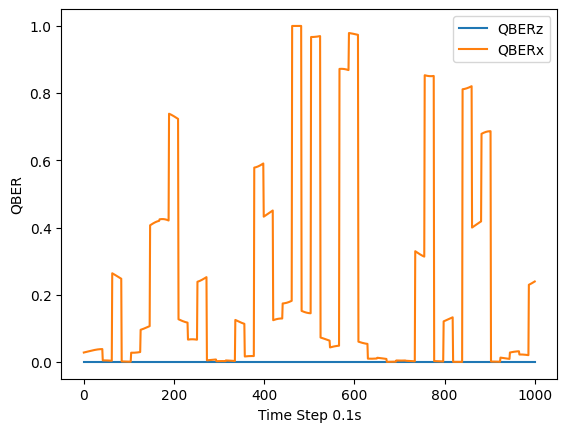

In [7]:
env.reset()

while not env.done:
    c = [gauss(0,1) for _ in range(4)]
    env.step(a_alice=[np.array(c), np.zeros(4), np.zeros(4), np.zeros(4)])

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

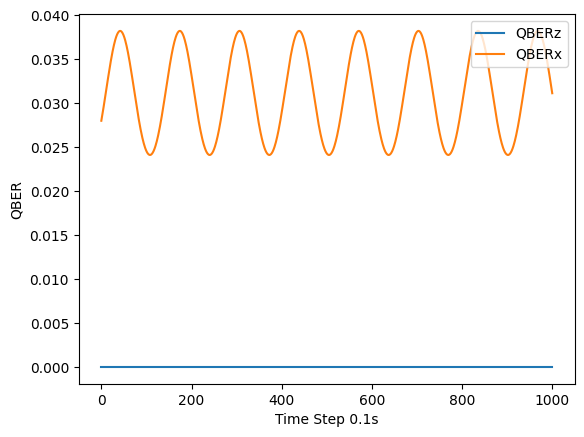

In [10]:
env.fixed_errors_flags = [True, True, True, True,
                          False, True, True, True,
                          True, True, True, True]

env.reset()

while not env.done:
    env.step()

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

200


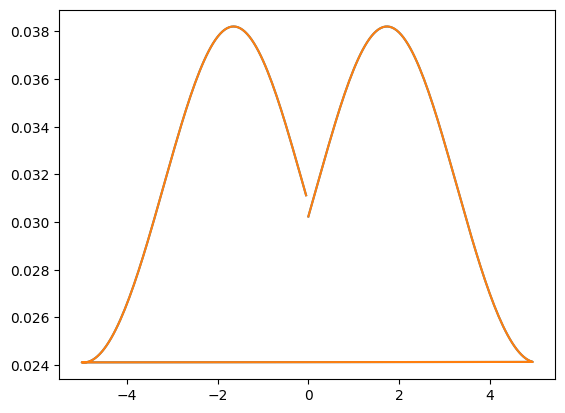

In [18]:
qbfft = np.fft.rfft(QBER[-200:])
print(len(qbfft))
freq = np.fft.fftfreq(len(QBER[-200:]), d=env.delta_t)

plt.plot(freq, np.abs(qbfft))